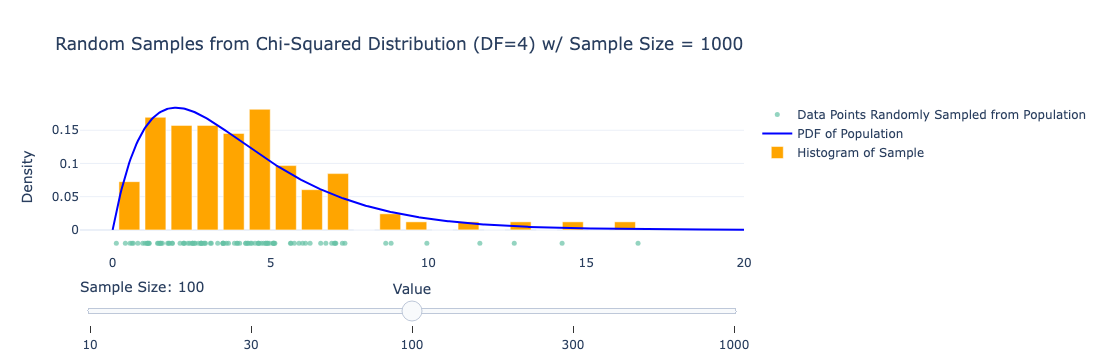

In [27]:
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd
from scipy.stats import chi2
from matplotlib.colors import to_hex

# Function to generate the interactive Chi-Squared plot
def generate_interactive_chi_square_with_swarm():
    # Parameters
    initial_sample_size = 100
    sample_sizes = [10, 30, 100, 300, 1000]  # Slider options
    df = 4  # Fixed degrees of freedom
    x = np.linspace(0, 20, 500)  # PDF range

    # Function to generate data
    def generate_data(sample_size):
        y_pdf = chi2.pdf(x, df=df)
        sample = np.random.chisquare(df=df, size=sample_size)
        hist, bins = np.histogram(sample, bins=20, density=True)
        bin_centers = (bins[:-1] + bins[1:]) / 2
        return y_pdf, sample, hist, bin_centers

    # Initial data
    y_pdf, sample, hist, bin_centers = generate_data(initial_sample_size)

    # Create a swarm plot using Seaborn
    sample_df = pd.DataFrame({"Value": sample})
    sns_colors = sns.color_palette("Set2", 10)
    swarm_color = to_hex(sns_colors[0])  # Convert Seaborn color to HEX

    # Create figure
    fig = go.Figure()

    # Swarm Plot (Scatter representation of sample points)
    fig.add_trace(go.Scatter(
        x=sample,
        y=np.zeros_like(sample) - 0.02,  # Offset slightly for visibility
        mode='markers',
        marker=dict(color=swarm_color, size=5, opacity=0.7),
        name="Data Points Randomly Sampled from Population"
    ))

    # Add PDF line
    fig.add_trace(go.Scatter(
        x=x,
        y=y_pdf,
        mode='lines',
        name="PDF of Population",
        line=dict(color='blue')
    ))

    # Add histogram
    fig.add_trace(go.Bar(
        x=bin_centers,
        y=hist,
        name="Histogram of Sample",
        marker=dict(color='orange')
    ))

    # Slider steps
    steps = []
    for sample_size in sample_sizes:
        y_pdf, sample, hist, bin_centers = generate_data(sample_size)
        steps.append({
            "label": str(sample_size),
            "method": "update",
            "args": [
                {
                    "x": [sample, x, bin_centers],
                    "y": [np.zeros_like(sample) - 0.02, y_pdf, hist]
                },
                {
                    "title": f"Random Samples from Chi-Squared Distribution (DF=4) w/ Sample Size = {sample_size}"
                }
            ]
        })

    # Add layout with slider
    fig.update_layout(
        title=f"Random Samples from Chi-Squared Distribution (DF=4) w/ Sample Size = {sample_size}",
        xaxis_title="Value",
        yaxis_title="Density",
        template="plotly_white",
        sliders=[{
            "steps": steps,
            "active": sample_sizes.index(initial_sample_size),
            "currentvalue": {"prefix": "Sample Size: ", "font": {"size": 14}},
        }],
        showlegend=True
    )

    # Save as HTML
    fig.write_html("chi_squared_interactive.html", include_plotlyjs="cdn")

    return fig

# Generate and show the interactive plot
fig = generate_interactive_chi_square_with_swarm()
fig.show()
